<a href="https://colab.research.google.com/github/PouyaSonej/Cifar10/blob/main/cifar_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


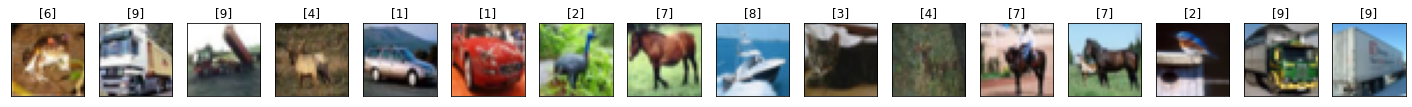

In [ ]:
# show dataset
plt.figure(figsize=(25,4))
for i in range(16):
    plt.subplot(1,16,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])

In [ ]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# define model
def define_model(shape, num_layers):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=shape))
    model.add(keras.layers.Flatten())
    for l in range(num_layers):
        model.add(keras.layers.Dense(units=512, activation='relu'))
    model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

    return model

In [ ]:
# evaluate models
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []
for num_layers in range(0, 21):
    model = define_model(x_train[0].shape, num_layers)

    # compile model
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # train model
    history = model.fit(x_train, y_train,
                        batch_size=200,
                        epochs=20,
                        validation_data=(x_test, y_test),
                        shuffle=True,
                        verbose=0)

    #
    train_loss.append(history.history['loss'][-1])
    valid_loss.append(history.history['val_loss'][-1])
    train_acc.append(history.history['accuracy'][-1])
    valid_acc.append(history.history['val_accuracy'][-1])

    print('layers = {}, params = {}, train_acc = {:4f}, val_acc = {:4f}'.format(num_layers+1, model.count_params(), train_acc[-1], valid_acc[-1]))

layers = 1, params = 30730, train_acc = 0.283580, val_acc = 0.276200
layers = 2, params = 1578506, train_acc = 0.381600, val_acc = 0.323900
layers = 3, params = 1841162, train_acc = 0.453720, val_acc = 0.366700
layers = 4, params = 2103818, train_acc = 0.490260, val_acc = 0.386000
layers = 5, params = 2366474, train_acc = 0.530360, val_acc = 0.443300
layers = 6, params = 2629130, train_acc = 0.580860, val_acc = 0.466600
layers = 7, params = 2891786, train_acc = 0.625340, val_acc = 0.483700
layers = 8, params = 3154442, train_acc = 0.636920, val_acc = 0.491700
layers = 9, params = 3417098, train_acc = 0.654440, val_acc = 0.494100
layers = 10, params = 3679754, train_acc = 0.662200, val_acc = 0.512500
layers = 11, params = 3942410, train_acc = 0.668900, val_acc = 0.503800
layers = 12, params = 4205066, train_acc = 0.690460, val_acc = 0.504400
layers = 13, params = 4467722, train_acc = 0.692580, val_acc = 0.507700
layers = 14, params = 4730378, train_acc = 0.691980, val_acc = 0.511900
lay

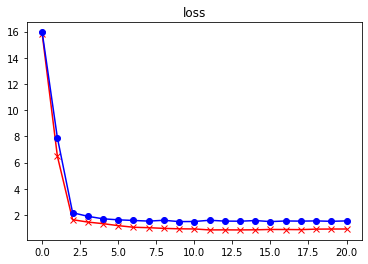

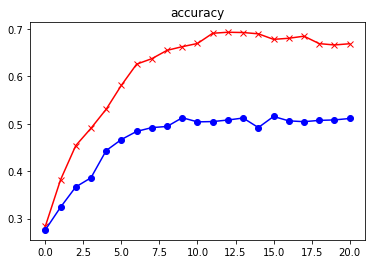

In [ ]:
plt.figure()
plt.title('loss')
plt.plot(train_loss, 'r-x')
plt.plot(valid_loss, 'b-o')

plt.figure()
plt.title('accuracy')
plt.plot(train_acc, 'r-x')
plt.plot(valid_acc, 'b-o')

Accuracy = 51.09 %
[[654  35  58   9  63  12  20  44  71  34]
 [ 68 670  13  11  15   8  25  33  39 118]
 [103  22 358  52 182  63 108  89   6  17]
 [ 51  30  73 234 113 186 147  99  21  46]
 [ 59  15 127  31 464  37 122 118  14  13]
 [ 34  16  86 131  99 376 106 122   9  21]
 [ 28  14  54  43 148  48 602  42  10  11]
 [ 43  22  37  33  75  44  23 678   7  38]
 [194  61   6  10  47  17  20  35 549  61]
 [ 71 219  11  19  16  14  26  60  40 524]]
[[0.654 0.035 0.058 0.009 0.063 0.012 0.02  0.044 0.071 0.034]
 [0.068 0.67  0.013 0.011 0.015 0.008 0.025 0.033 0.039 0.118]
 [0.103 0.022 0.358 0.052 0.182 0.063 0.108 0.089 0.006 0.017]
 [0.051 0.03  0.073 0.234 0.113 0.186 0.147 0.099 0.021 0.046]
 [0.059 0.015 0.127 0.031 0.464 0.037 0.122 0.118 0.014 0.013]
 [0.034 0.016 0.086 0.131 0.099 0.376 0.106 0.122 0.009 0.021]
 [0.028 0.014 0.054 0.043 0.148 0.048 0.602 0.042 0.01  0.011]
 [0.043 0.022 0.037 0.033 0.075 0.044 0.023 0.678 0.007 0.038]
 [0.194 0.061 0.006 0.01  0.047 0.017 0.02  0.

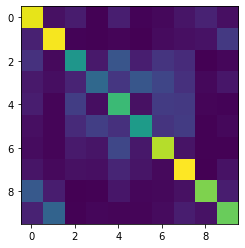

In [ ]:
# plot confusion matrix
import sklearn.metrics

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print('Accuracy = {} %'.format(100 * np.sum(y_pred == y_true) / len(y_true)))

conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

conf_norm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(conf_norm)